In [33]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
"""Load dataset"""
data1 = pd.read_csv('dataframe/peach_spectra_brix.csv')
data2 = pd.read_csv('dataframe/NIRplums_brix_firmness.csv')
data1.head()

,Brix,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,...,wl591,wl592,wl593,wl594,wl595,wl596,wl597,wl598,wl599,wl600
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,...,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,...,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,...,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,...,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,...,0.719793,0.718875,0.716860,0.713771,0.709577,0.704232,0.697717,0.689882,0.680748,0.670263


In [42]:
"""MIN-MAX SCALER"""
def MMS(input_spectra):
    return MinMaxScaler().fit_transform(input_spectra)

"""STANDARD SCALER"""
def SS(input_spectra):
    return StandardScaler().fit_transform(input_spectra)

"""SIMPLE MOVING AVERAGE"""
def sma(input_spectra, window_size):
    df = pd.DataFrame(input_spectra)
    moving_averages = df.rolling(window_size, min_periods=1).mean()#.iloc[window_size-1:].values
    return moving_averages

"""MULTIPLICATIVE SCATTER CORRECTION"""
def msc(input_spectra, reference=None):
    # --- Mean center correction
    for i in range(input_spectra.shape[0]):
        input_spectra[i,:] -= input_spectra[i,:].mean()
    # --- Get the reference spektrum. If no given, estimate it from the mean
    if reference is None:
        # --- Calculate mean
        ref = np.mean(input_spectra, axis=0)
    else:
        ref = reference
    # --- Define a new array and populate it with the corrected data
    data_msc = np.zeros_like(input_spectra)
    for i in range(input_spectra.shape[0]):
        # --- Run regression
        fit = np.polyfit(ref, input_spectra[i,:], 1, full=True)
        # --- Apply correction
        data_msc[i,:] = (input_spectra[i,:] - fit[0][1]) / fit[0][0]
    return data_msc, ref

"""STANDARD NORMAL VARIATE"""
def snv(input_spectra):
    # --- Define a new array and populate it with the corrected data
    output_data = np.zeros_like(input_spectra)
    for i in range(input_spectra.shape[0]):
        # --- Apply correction
        output_data[i,:] = (input_spectra[i,:] - np.mean(input_spectra[i,:])) / np.std(input_spectra[i,:])
    return output_data

"""SAVITZKY-GOLAY SMOOTHING"""
def SG_smoothing(input_data, window_size, polyorder):
    SG_smoothing =savgol_filter(input_data,
                                window_length=window_size,
                                polyorder=polyorder,
                                mode="nearest")
    return SG_smoothing

"""SAVITZKY-GOLAY DERIVATIVE"""
def SG_derivative(input_data, window_size, polyorder, derivative):
    SG_filter = savgol_filter(input_data,
                              window_length=window_size,
                              polyorder=polyorder,
                              deriv=derivative,
                              delta=1.0,
                              axis=-1,
                              mode='interp', #'nearest'
                              cval=0.0)
    return SG_filter


600


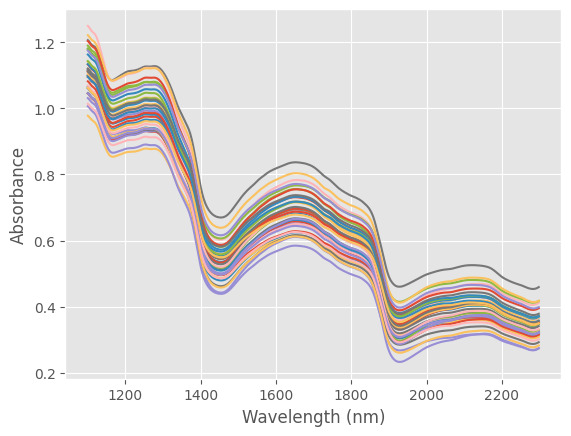

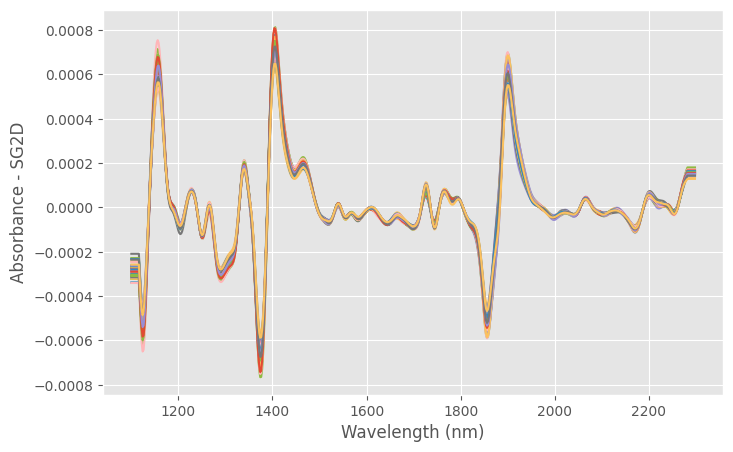

In [62]:
"""Variable"""
y = data2['Brix'].values
x = data2.values[:,2:]

wl = np.arange(1100, 2300, 2)
print(len(wl))

x_sgd2 = SG_derivative(x, 17, polyorder=2, derivative=2)

"""Plot Spectra"""
with plt.style.context('ggplot'):
    plt.plot(wl, x.T)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Absorbance")
    plt.show()
plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.plot(wl, x_sgd2.T)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Absorbance - SG2D")
    plt.show()

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 35
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 35
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 35
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 35
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cross_decomposition\

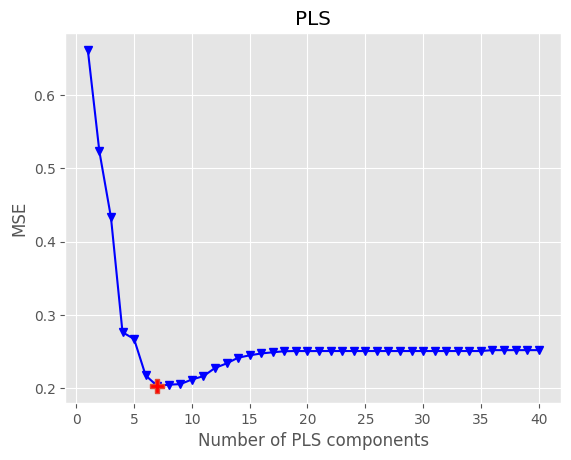

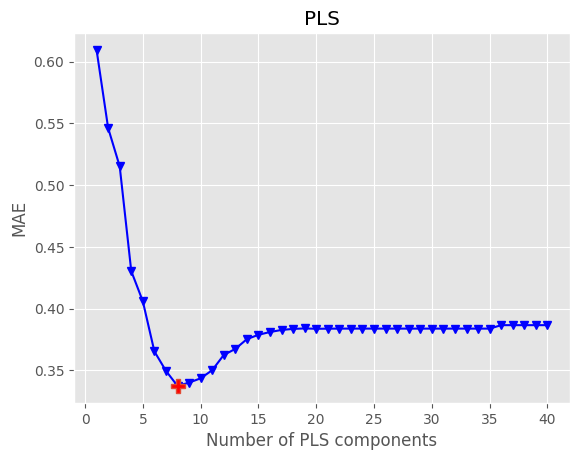

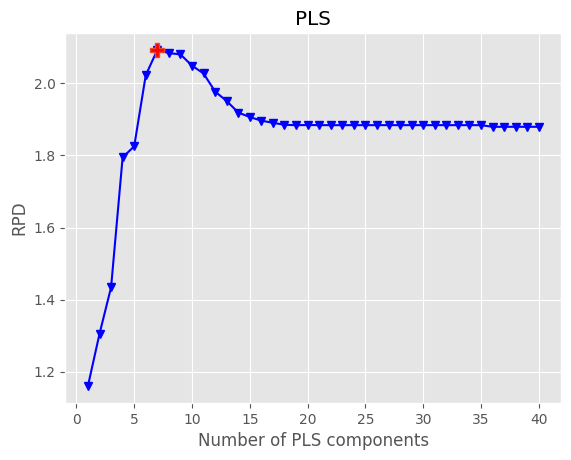

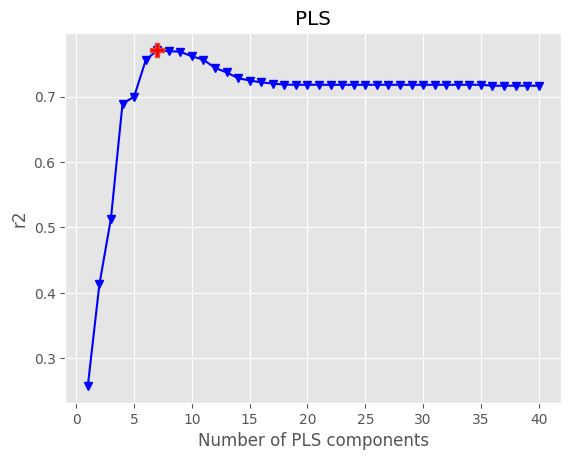

In [63]:
def optimize_pls_cv(x, y, n_comp):
    # Define PLS objective
    pls = PLSRegression(n_components=n_comp)

    # Cross validation
    y_cv = cross_val_predict(pls, x, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    mae = mean_absolute_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)

    return y_cv, r2, mse, mae, rpd

r2s = []
mses = []
maes = []
rpds = []
xticks = np.arange(1, 41)
for n_comp in xticks:
    y_cv, r2, mse, mae, rpd = optimize_pls_cv(x_sgd2, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    maes.append(mae)
    rpds.append(rpd)

def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective == 'min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc = 'red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')
    plt.show()

plot_metrics(mses, 'MSE', 'min')
plot_metrics(maes, 'MAE', 'min')
plot_metrics(rpds, 'RPD', 'max')
plot_metrics(r2s, 'r2', 'max')

In [64]:
y_cv, r2, mse, mae, rpd = optimize_pls_cv(x_sgd2, y, 7)
print('R2: %0.4f, MSE: %0.4f, MAE: %0.4f, RPD: %0.4f' %(r2, mse, mae, rpd))

R2: 0.7717, MSE: 0.2034, MAE: 0.3497, RPD: 2.0929


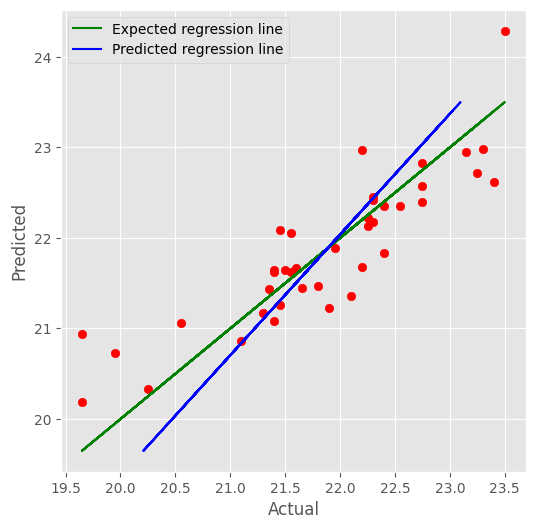

In [65]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y, y_cv, color='red')
    plt.plot(y, y, '-g', label='Expected regression line')
    z = np.polyfit(y, y_cv, 1)
    plt.plot(np.polyval(z, y), y, color='blue', label='Predicted regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
plt.show()